# HOUSE PRICE PREDICTION PROJECT
#### Link to Dataset : https://www.kaggle.com/code/abirchatterjee17/house-price-prediction
## Project by : Eiman Wahab


### Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Step 1: Data Collection

In [2]:
#Importing dataset
df = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')

In [3]:
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


### Step 2: Data Exploration and Preprocessing

In [4]:
# Removing the Useless col
df.drop(columns=['Unnamed: 0'], inplace=True)


In [5]:
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [6]:
df.shape

(924, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 50.7+ KB


In [8]:
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [9]:
df.isnull().sum() 

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [10]:
df.columns[df.isnull().any()].tolist()

['Price']

In [11]:
#filling the missing values of Price.
df['Price'].fillna(df['Price'].mean(), inplace=True)


In [12]:
df.isnull().sum() 

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [13]:
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


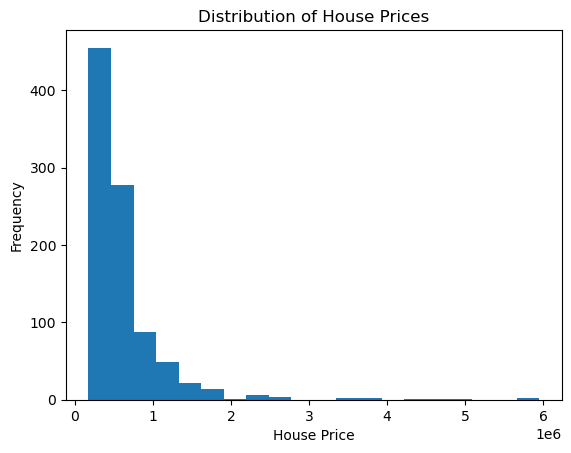

In [14]:
# Explore the distribution of house prices
plt.hist(df['Price'], bins=20)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

### Visualize the relationships between individual features and house prices.


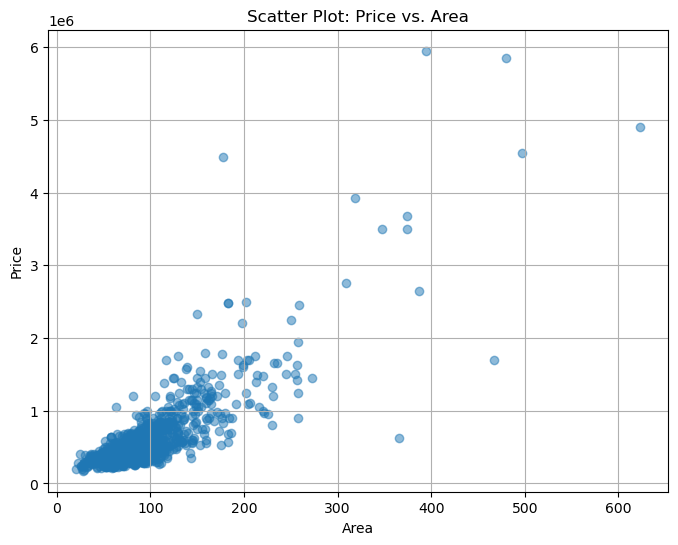

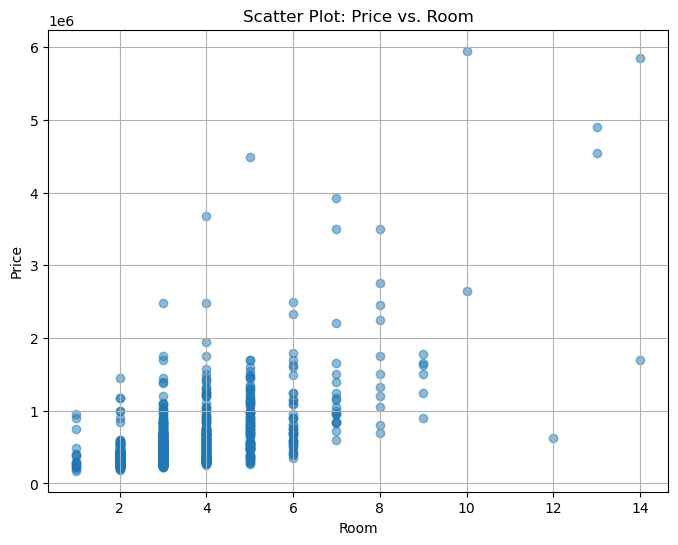

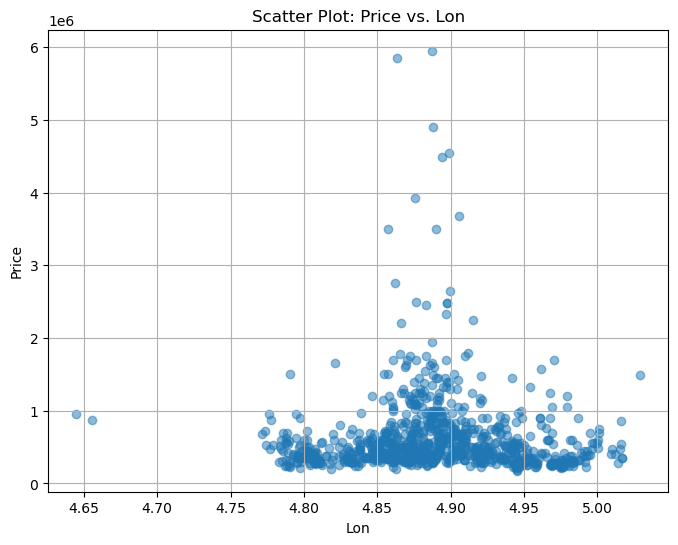

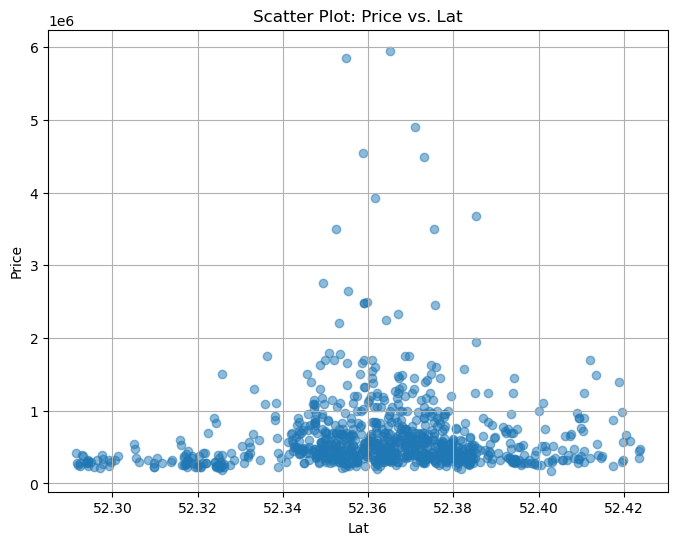

In [15]:
features = ['Area', 'Room', 'Lon', 'Lat']

# Create scatter plots for each feature vs. Price
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Price'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot: Price vs. {feature}')
    plt.grid(True)
    plt.show()

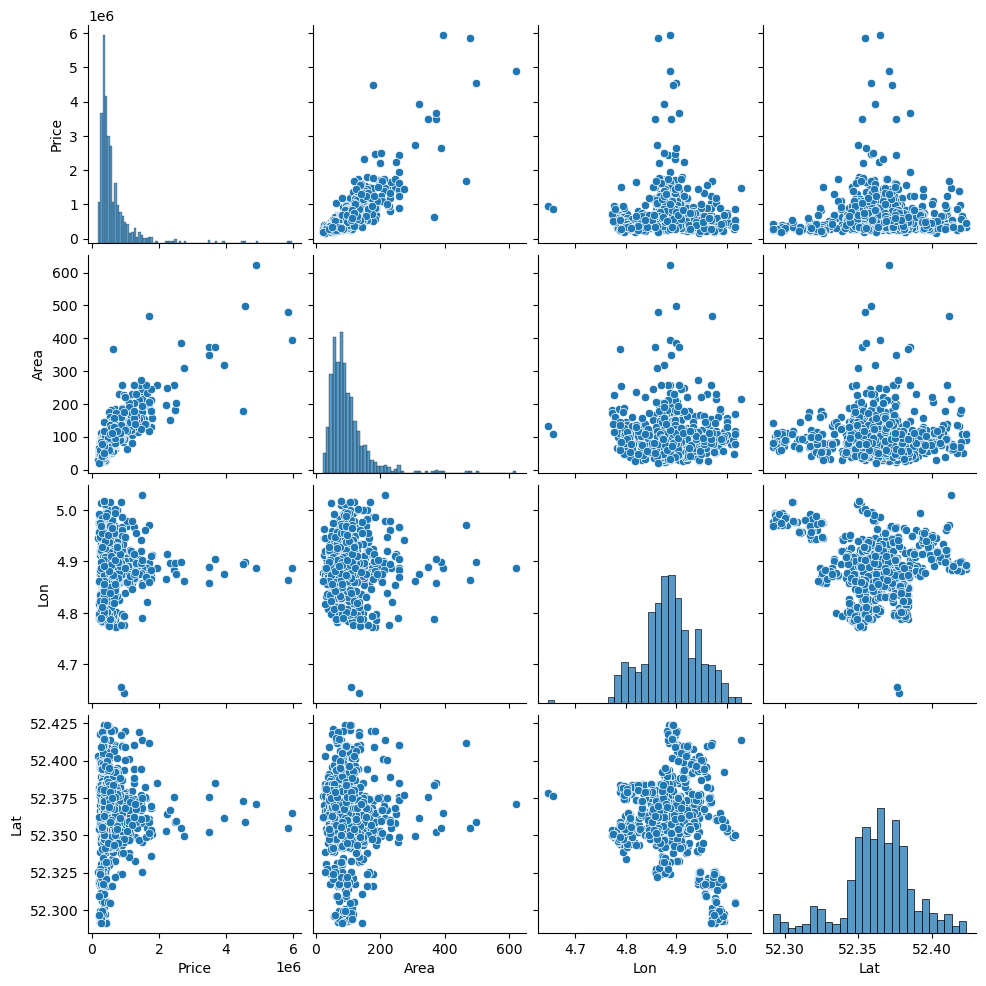

In [16]:
# Pair Plot
sns.pairplot(df, vars=['Price', 'Area', 'Lon', 'Lat'])
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to the "Zip" 
df['Zip_Encoded'] = label_encoder.fit_transform(df['Zip'])

# Apply label encoding to the "Address"
df['Address_Encoded'] = label_encoder.fit_transform(df['Address'])

# Drop the original Zip and  Address columns
df.drop(columns=['Zip', 'Address'], inplace=True)

df.head()

,Price,Area,Room,Lon,Lat,Zip_Encoded,Address_Encoded
0,685000.0,64,3,4.907736,52.356157,694,97
1,475000.0,60,3,4.850476,52.348586,421,450
2,850000.0,109,4,4.944774,52.343782,752,905
3,580000.0,128,6,4.789928,52.343712,436,754
4,720000.0,138,5,4.902503,52.410538,257,898


In [18]:
import pandas as pd
from scipy import stats

# Select all columns with numeric data types
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate the Z-scores for the numerical columns
z_scores = stats.zscore(df[numerical_columns])

threshold = 3

# Identify rows where any of the Z-scores exceed the threshold
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

df = df[~outlier_indices]

df.head()


,Price,Area,Room,Lon,Lat,Zip_Encoded,Address_Encoded
0,685000.0,64,3,4.907736,52.356157,694,97
1,475000.0,60,3,4.850476,52.348586,421,450
2,850000.0,109,4,4.944774,52.343782,752,905
3,580000.0,128,6,4.789928,52.343712,436,754
4,720000.0,138,5,4.902503,52.410538,257,898


### Step 4: Feature Selection

Top Correlated Features with Price:
Price              1.000000
Area               0.775466
Room               0.511610
Lat                0.094291
Address_Encoded    0.070001
Lon               -0.011576
Zip_Encoded       -0.232540
Name: Price, dtype: float64


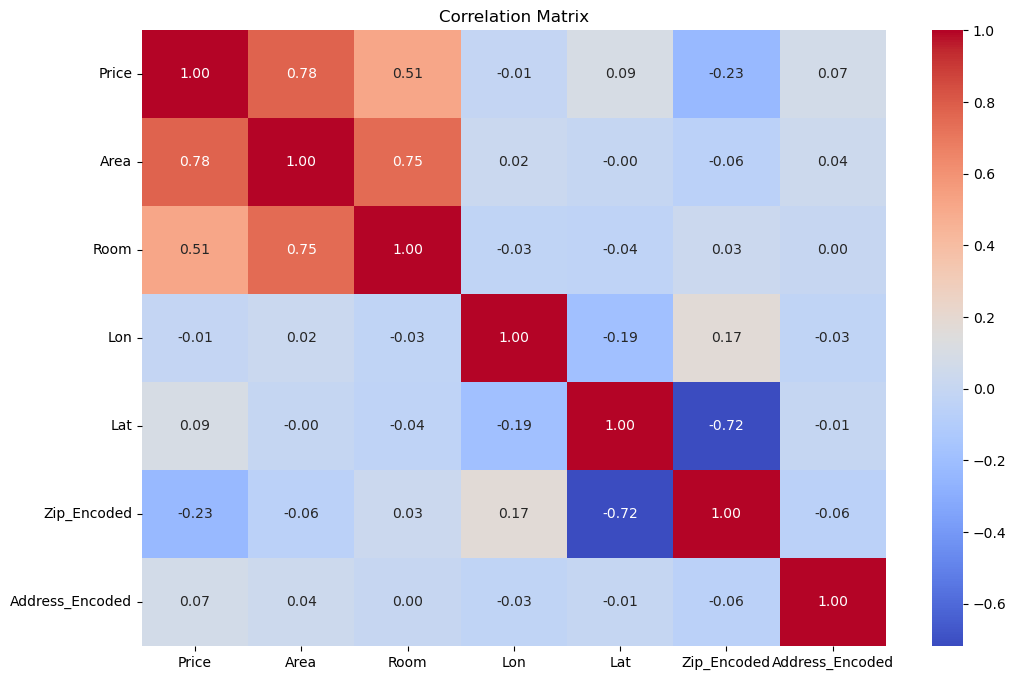

In [19]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of each feature with the "Price" column
price_correlations = correlation_matrix['Price'].sort_values(ascending=False)

print("Top Correlated Features with Price:")
print(price_correlations)
 
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Step 5: Model Selection
### Using regression algorithm such as Linear Regression, Decision Tree Regression, and Random Forest Regression


### Data Split

In [58]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Price','Address_Encoded','Zip_Encoded'])
y = df['Price'] 

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Model Training

In [59]:
# Initialize and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [60]:
# Initialize and train the Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [61]:
# Initialize and train the Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [62]:
# Make predictions on the test set for each model
y_pred_linear = linear_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)


### Model Evaluation

In [63]:
# Evaluate the models and calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_linear, mse_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
mae_decision_tree, mse_decision_tree, rmse_decision_tree, r2_decision_tree = evaluate_model(y_test, y_pred_decision_tree)
mae_random_forest, mse_random_forest, rmse_random_forest, r2_random_forest = evaluate_model(y_test, y_pred_random_forest)


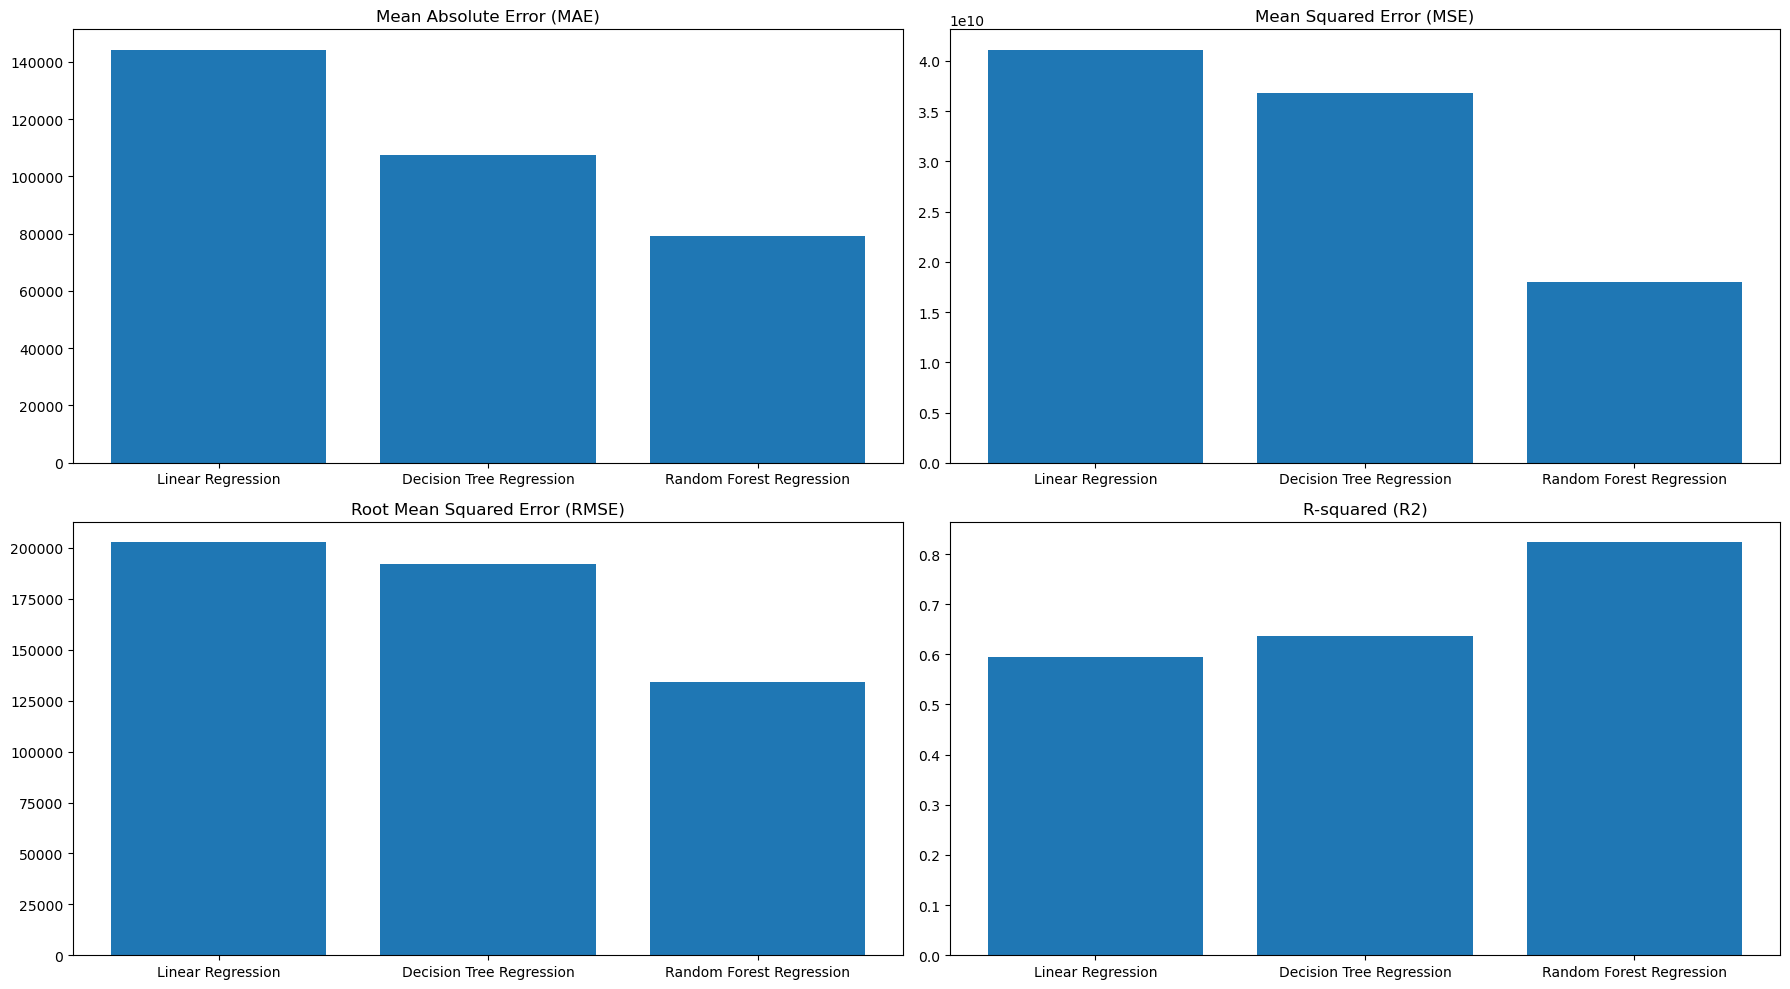

In [64]:
# Create a bar chart to compare the performance of the three models
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
mae_values = [mae_linear, mae_decision_tree, mae_random_forest]
mse_values = [mse_linear, mse_decision_tree, mse_random_forest]
rmse_values = [rmse_linear, rmse_decision_tree, rmse_random_forest]
r2_values = [r2_linear, r2_decision_tree, r2_random_forest]

plt.figure(figsize=(18, 10))  

# Top row of subplots
plt.subplot(2, 2, 1)
plt.bar(models, mae_values)
plt.title('Mean Absolute Error (MAE)')

plt.subplot(2, 2, 2)
plt.bar(models, mse_values)
plt.title('Mean Squared Error (MSE)')

# Bottom row of subplots
plt.subplot(2, 2, 3)
plt.bar(models, rmse_values)
plt.title('Root Mean Squared Error (RMSE)')

plt.subplot(2, 2, 4)
plt.bar(models, r2_values)
plt.title('R-squared (R2)')

plt.tight_layout()
plt.show()


### Prediction

In [66]:
#for Prediction we are using the trained the Random Forest Regression model.

def predict_house_price(area, num_rooms, lon, lat):
    hypothetical_df = pd.DataFrame({
        'Area': [area],
        'Room': [num_rooms],
        'Lon': [lon],
        'Lat': [lat]
    })

    predicted_price = random_forest_model.predict(hypothetical_df)

    return predicted_price[0]  # return the predicted price as a single value

area = 1500
num_rooms = 3
lon = -118.2437
lat = 34.0522

predicted_price = predict_house_price(area, num_rooms, lon, lat)

print("Predicted Price:", predicted_price)


Predicted Price: 1285250.0
